In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Write summary of data

#### Dirty Data
1. **title** - there are duplicate values
2. **director** - there are missing values
3. **cast** - it has missing values
4. **country** -  it has missing value
5. **date_added** - only keep the date , remove year
8. **country** - 195,367 remove , from the row
9. **rating** -  it has missing value
10. **duration** - it has missing values
11. **date_added** - change to datetime datatype
12. **date_added** - it has missing values
13. **release_year** - missing values
14. **release_year** - change to datetime datatype
15. **ratings** - NR & UR are same

#### Messy Data
1. **title** - some of the values are in upper case, for readability and analysis purpose turn it to lower case

 
y
.  for this rows


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()/df.count() * 100

show_id          0.000000
type             0.000000
title            0.000000
director        42.669691
cast            10.335755
country         10.418756
date_added       0.113675
release_year     0.000000
rating           0.045439
duration         0.034075
listed_in        0.000000
description      0.000000
dtype: float64

In [8]:
df.describe(include = 'object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [9]:
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
# title col to lower case
df['title'] = df['title'].str.lower()

In [12]:
# director missing values
df['director'] = df['director'].fillna('Unknown')

In [13]:
df['director'].isnull().sum()

0

In [15]:
# cast missing values
df['cast'] = df['cast'].fillna('Unknown')

In [16]:
df['cast'].isnull().sum()

0

In [17]:
df['country'] = df['country'].fillna('Unknown')

In [18]:
df['country'].isnull().sum()

0

In [19]:
df.isnull().sum()/df.count() * 100

# now we can delete the rest of null values

show_id         0.000000
type            0.000000
title           0.000000
director        0.000000
cast            0.000000
country         0.000000
date_added      0.113675
release_year    0.000000
rating          0.045439
duration        0.034075
listed_in       0.000000
description     0.000000
dtype: float64

In [20]:
df = df.dropna()

In [21]:
df.isnull().sum()/df.count() * 100

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [22]:
# convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'],errors = 'coerce')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8702 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


In [24]:
## cleaning country col
df['country'].iloc[365] = 'France'

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12360\2272174071.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['country'].iloc[365] = 'France'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12360\2272174071.py:2: SettingWithCopyWarning: 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8702 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


In [26]:
df['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [27]:
## convert selected columns to category
df = df.astype({'type':'category','rating':'category'})

#### EDA
##### Univariate Analysis

In [28]:
df1 = df.copy()
df1['Year'] = df.date_added.dt.year
df1['Month'] = df.date_added.dt.month
df1['Day'] = df.date_added.dt.day_name()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


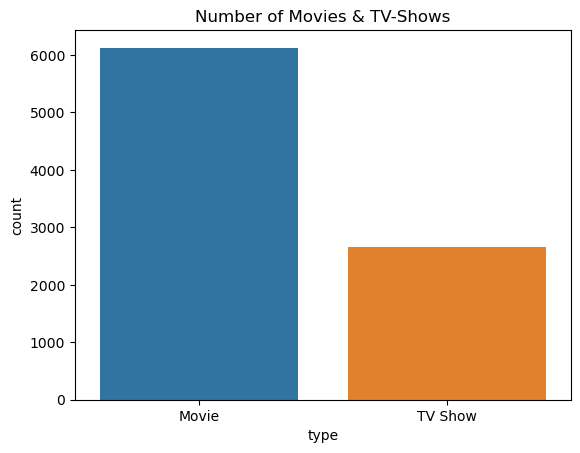

In [29]:
sns.countplot(x ='type',data=df1)

# title
plt.title('Number of Movies & TV-Shows')
plt.show()

##### Conclusion
1. Neflix has around 6000 movies and around only 2500 tv-shows.
There is a lot of difference between number of movies and tv-shows

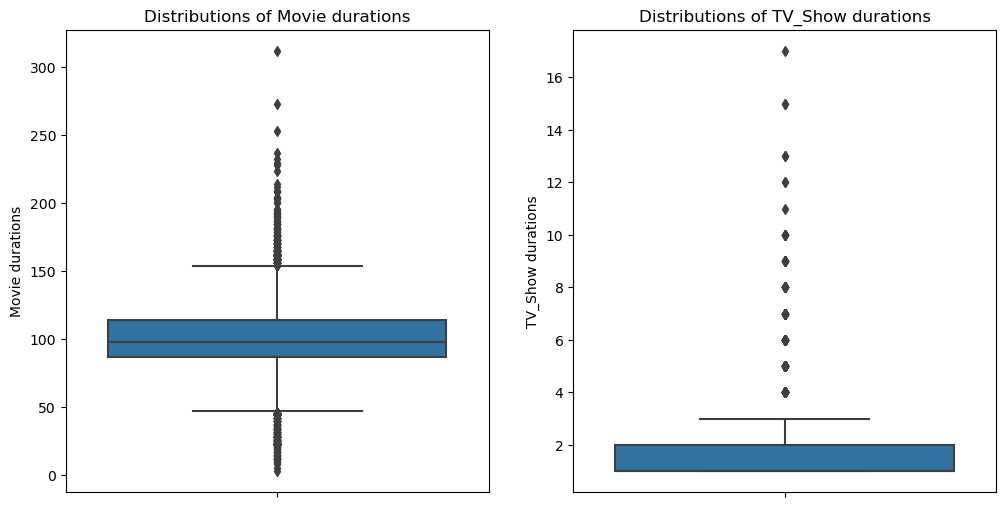

In [30]:
# extract movie durations
movie_durations = df.loc[df1['duration'].str.contains('min') == True, 'duration'].apply(lambda x: int(x.split(' ')[0]))

# extract tv-show durations
tv_show = df.loc[df1['duration'].str.contains('Season') == True, 'duration'].apply(lambda x: int(x.split(' ')[0]))

# Create subplots
fig, axs = plt.subplots(1,2, figsize = (12,6))

## boxplot movie durations
sns.boxplot(y = movie_durations, ax = axs[0])
axs[0].set_title('Distributions of Movie durations')
axs[0].set_ylabel('Movie durations')

## boxplot tv-show durations
sns.boxplot(y = tv_show, ax = axs[1])
axs[1].set_title('Distributions of TV_Show durations')
axs[1].set_ylabel('TV_Show durations')

plt.show()

1. Average movies duration is 100 minutes.
2. Most TV-Shows has 2 or 1 seasons.
3. There are many outliers in movies compared to tv-shows.
4. The movies with duration < = 50 are either stand-up comedy, documentries or kid's movies.

In [73]:
movi_dur = df.loc[(df['type'] == 'Movie')]

movi_dur.loc[movi_dur['duration'] == '50 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1542,s1543,Movie,vir das: outside in - the lockdown special,Vir Das,Vir Das,India,2020-12-16,2020,TV-MA,50 min,Stand-Up Comedy,Stage banter takes on a different — deeper — m...
1786,s1787,Movie,la gran ilusión,Antonio Díaz,Antonio Díaz,Unknown,2020-10-28,2016,TV-14,50 min,International Movies,"Known as ""El Mago Pop,"" illusionist Antonio Dí..."
1793,s1794,Movie,sarah cooper: everything's fine,Natasha Lyonne,"Sarah Cooper, Fred Armisen, Maya Rudolph, Ben ...",United States,2020-10-27,2020,TV-MA,50 min,Comedies,Comedian and Trump lip-synching sensation Sara...
2886,s2887,Movie,pete davidson: alive from new york,Jason Orley,Pete Davidson,United States,2020-02-25,2020,TV-MA,50 min,Stand-Up Comedy,"Comedian and ""SNL"" star Pete Davidson drops a ..."
4237,s4238,Movie,sam kinison: breaking the rules,Walter C. Miller,Sam Kinison,United States,2018-12-31,1987,TV-MA,50 min,Stand-Up Comedy,The one-time preacher shakes and shudders as h...
4491,s4492,Movie,derren brown: sacrifice,Unknown,Derren Brown,Unknown,2018-10-19,2018,TV-MA,50 min,Movies,Illusionist Derren Brown concocts a psychologi...
4683,s4684,Movie,maria bamford: the special special special,Jordan Brady,"Maria Bamford, Wayne Federman, Jackie Kashian",United States,2018-08-25,2012,TV-MA,50 min,Stand-Up Comedy,"Spend an evening with gleeful, oh-so-awkward M..."
5525,s5526,Movie,lucas brothers: on drugs,Jay Chapman,"Keith Lucas, Kenny Lucas",United States,2017-04-18,2017,TV-MA,50 min,Stand-Up Comedy,Deadpan twin comics Keith and Kenny Lucas take...
7598,s7599,Movie,not alone,"Kiki Goshay, Jacqueline Monetta",Unknown,United States,2018-01-01,2017,TV-14,50 min,Documentaries,An 18-year-old struggling to understand her be...
8737,s8738,Movie,why are we getting so fat?,"Milla Harrison-Hansley, Alicky Sussman",Giles Yeo,United Kingdom,2019-02-01,2016,TV-14,50 min,Documentaries,A Cambridge geneticist dispels misconceptions ...


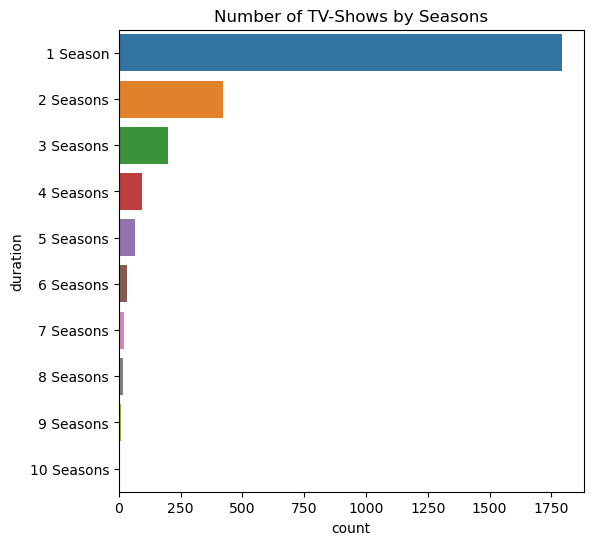

In [31]:
# filtering the data for seasons
tv_showd = df.loc[df['duration'].str.contains('Season') == True, 'duration'].value_counts().reset_index()[:10]

# creating barplot for number tv_shows by season
plt.figure(figsize = (6,6))
sns.barplot(data=tv_showd, x = 'count', y = 'duration')

plt.title('Number of TV-Shows by Seasons')
plt.show()

1. More than 1750 tv-shows has duration of season 1, followed by season 2 & 3

##### Bivariate Analysis

In [32]:
df1['month_name'] = df.date_added.dt.month_name()

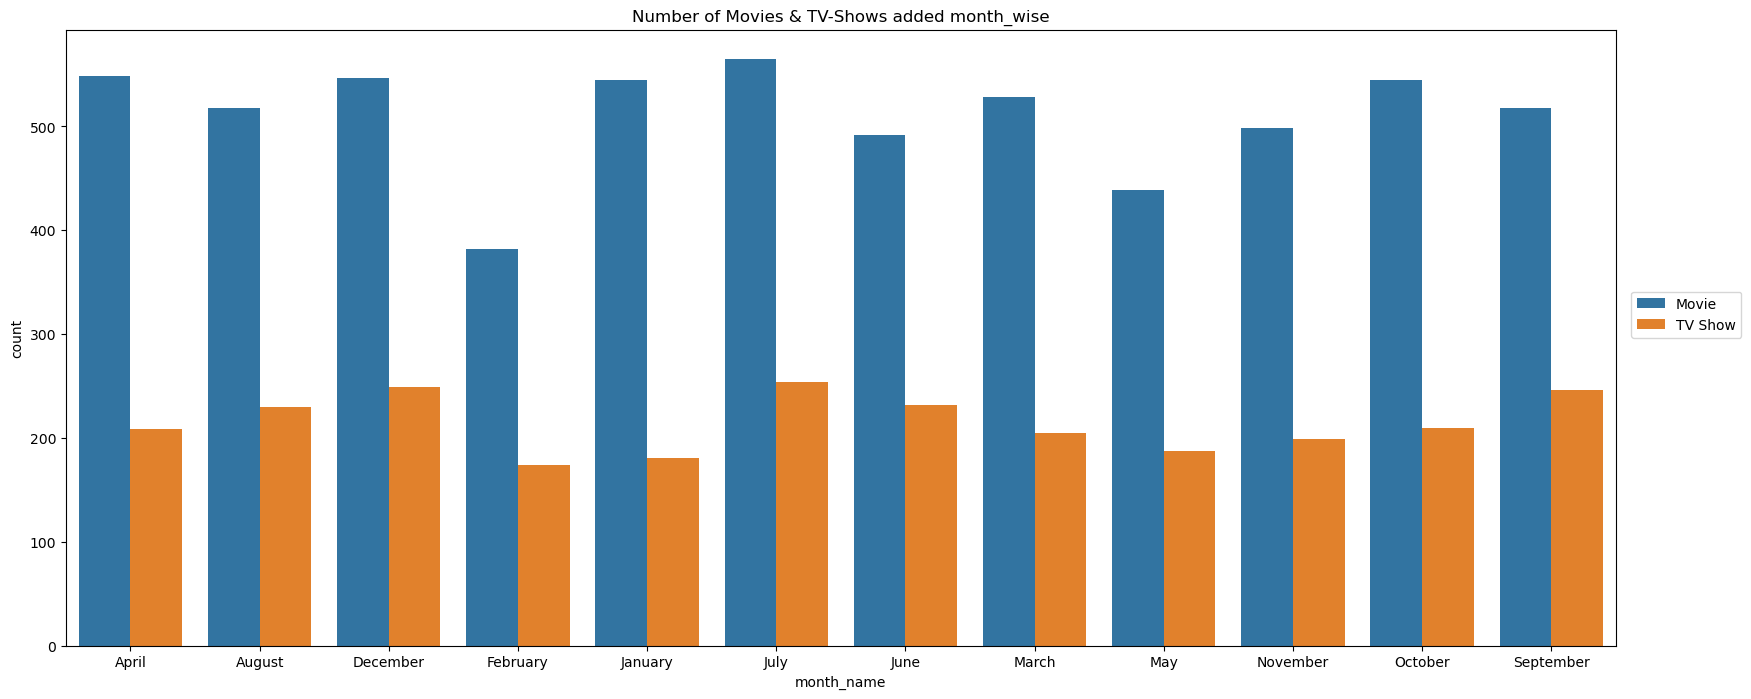

In [33]:
# figure size
plt.figure(figsize = (20,8))

# number of movies & tv-shows countplot
sns.countplot(data = df1,  x = df1['month_name'].sort_values(), hue = 'type')
plt.title('Number of Movies & TV-Shows added month_wise')

plt.legend(loc = (1.01,0.5))
plt.show()

1. April,July & December are the months when more movies were added
2. Movies are added way more compare to TV-Shows

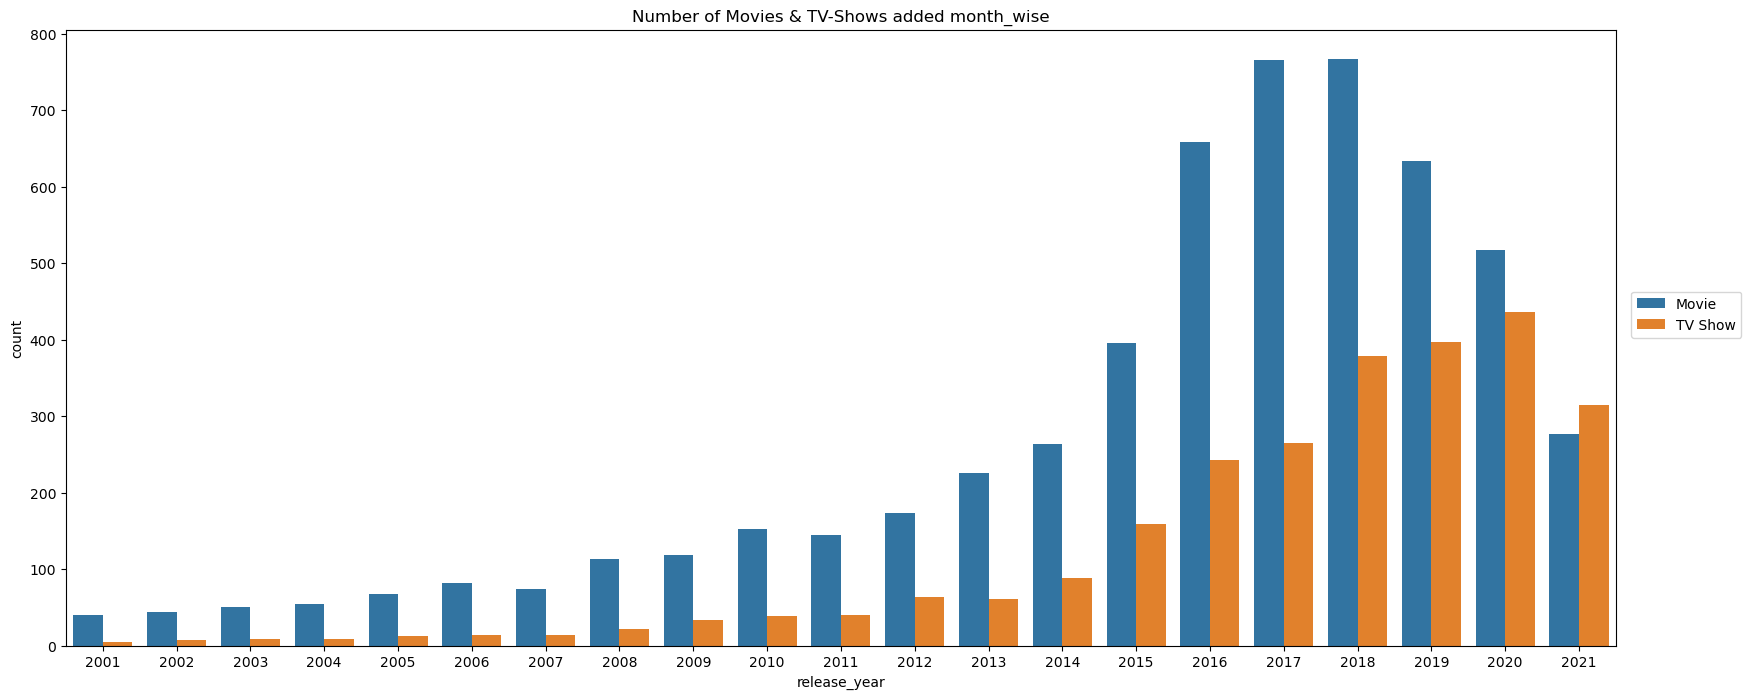

In [34]:
# filter the data for release_year > 2000
year = df1[df1['release_year'] > 2000]

# figure size
plt.figure(figsize = (20,8))

# number of movies & tv-shows countplot
sns.countplot(data = year,  x = 'release_year', hue = 'type')
plt.title('Number of Movies & TV-Shows added month_wise')

plt.legend(loc = (1.01,0.5))
plt.show()

1. The number of movies & tv-shows are increasing year by year but their is significant growth after 2015 and in 2021 it has decreased.
2. In 2020 most number of tv-shows were added
3. In 2021 the the number of tv-shows are more than movies compared to all previous year.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you wil

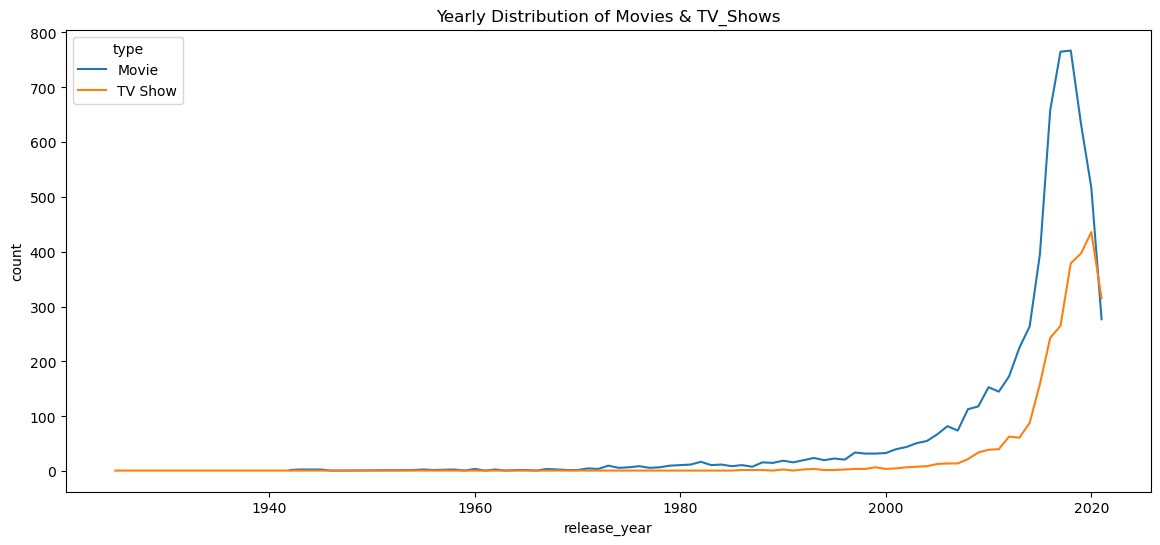

In [35]:
# grouping data by release_year & type
mo_tvgrp = df.groupby([df.release_year,df.type], observed=True).size().reset_index(name = 'count')

mo_tvgrp.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

# movies & tvshows through the years
plt.figure(figsize = (14,6))
sns.lineplot(data = mo_tvgrp, x = 'release_year', y = 'count' , hue = 'type')

plt.title('Yearly Distribution of Movies & TV_Shows')
plt.show()

In [36]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,dick johnson is dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,blood & water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,jailbirds new orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,kota factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [37]:
# breaking the nested 'country' col
country = df['country'].apply(lambda x: str(x).split(',')).tolist()

country_df = pd.DataFrame(country, index = df['title'])
country_df = country_df.stack().reset_index()
country_df.drop(columns = 'level_1',inplace =  True)
country_df.columns = ['title','country']

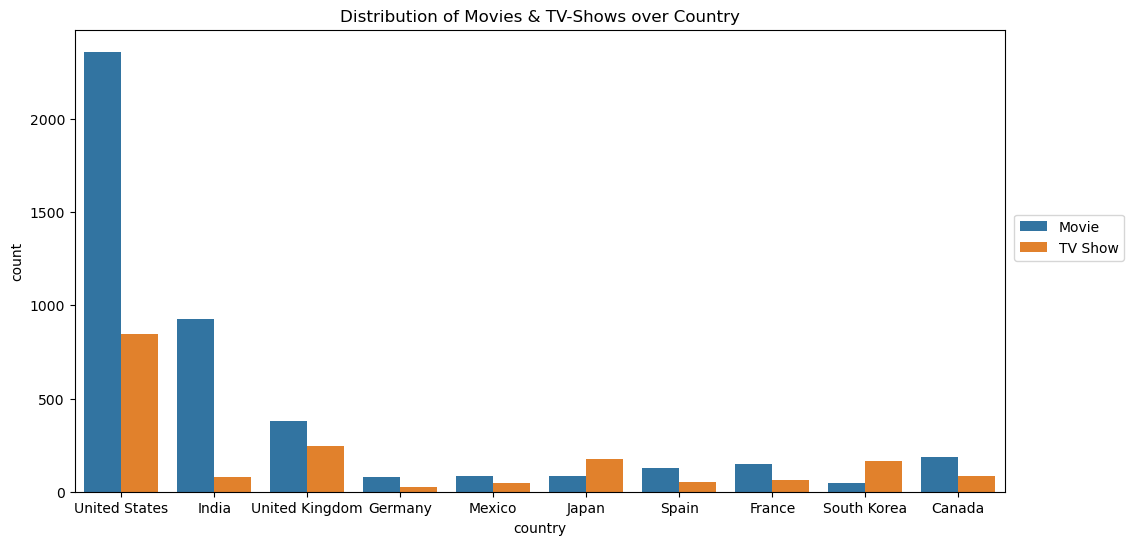

In [38]:
# merging the country_df with df
country_wise_df1 = df.merge(country_df, on = 'title')

# drop col country_x
country_wise_df1.drop(columns = 'country_x',inplace=True)

# rename country_y
country_wise_df1.rename(columns = {'country_y':'country'},inplace=True)

# filter unknown values ffrom country_df1
country_wise_df1 = country_wise_df1.loc[country_wise_df1['country'] != 'Unknown']

# top 10 countries according frequency
top_country = country_wise_df1['country'].str.strip().value_counts().head(10).reset_index()

# merge the top_country with country_Df1
country_wise_df1 = country_wise_df1.merge(top_country, how="inner", on="country")

# create countplot to show the difference
plt.figure(figsize = (12,6))
sns.countplot(data = country_wise_df1, x = "country",hue = 'type')
plt.title("Distribution of Movies & TV-Shows over Country")

plt.legend(loc = (1.01,0.5))
plt.show()

1. Most of the Movies on Netflix is from United States,followed by India & United Kingdom.
2. Most TV-Shows are from United States, followed by UK,South Korea & Japan

In [39]:
df['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [40]:
df['rating'] = df['rating'].replace('UR','NR')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12360\3144273568.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['rating'] = df['rating'].replace('UR','NR')


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


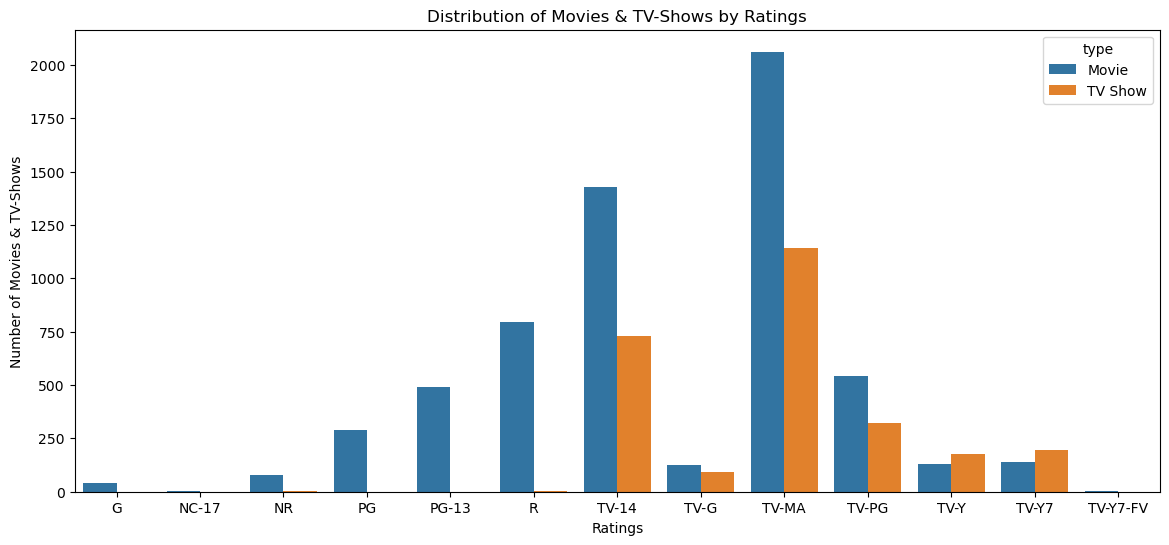

In [41]:
# figure size
plt.figure(figsize =(14,6))

# create distribution of content by rating
sns.countplot(data = df, x = 'rating', hue = 'type')

plt.title('Distribution of Movies & TV-Shows by Ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of Movies & TV-Shows')
plt.show()

1. Most movies on Netflix are TV-MA rated, followed by TV-14 & R
2. Most TV-Shows on Netflix are also TV-MA rated, followed by TV-14 & TV-PG

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


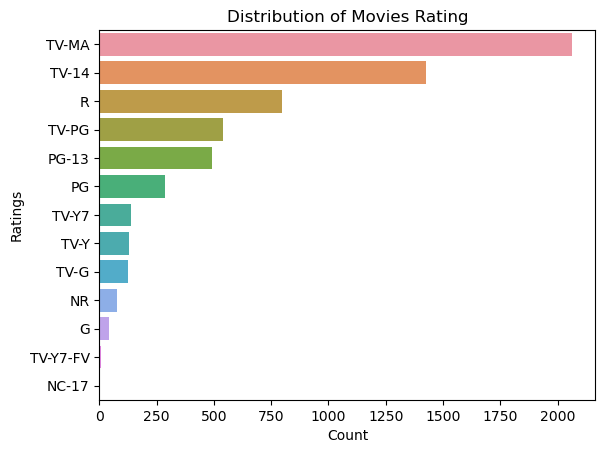

In [42]:
# filter the data for movies 
movies = df.loc[df['type'] == 'Movie']
# count of each ratings
ratings = movies['rating'].value_counts().sort_values(ascending = False)

# create countplot for distribution of ratings for movies
sns.countplot(data = movies, y = 'rating', order = ratings.index)

plt.title('Distribution of Movies Rating')
plt.ylabel('Ratings')
plt.xlabel('Count')
plt.show()

1. Netlix has a lot less content for general audience and all ages.
2. Most content on Netflix is for mature audience.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


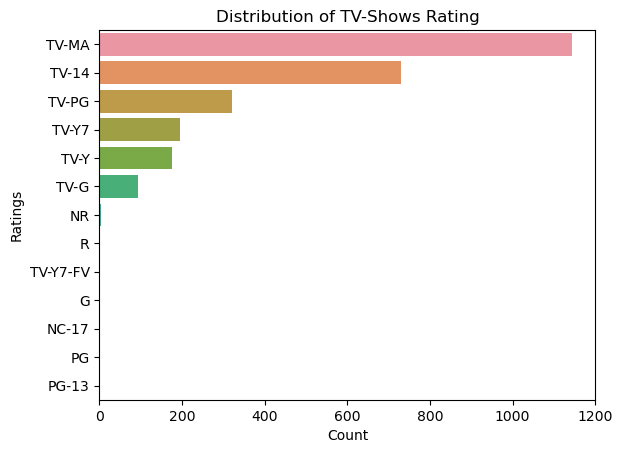

In [43]:
# filter the data for movies 
tv_shows = df[df['type'] == 'TV Show']

# count of each ratings
ratings1 = tv_shows['rating'].value_counts().sort_values(ascending = False)

# create countplot for distribution of ratings for movies
sns.countplot(data = tv_shows, y = 'rating', order = ratings1.index)

plt.title('Distribution of TV-Shows Rating')
plt.ylabel('Ratings')
plt.xlabel('Count')
plt.show()


1. Most TV-Shows are adult rated & shows which requires parental guidance.
2. Netflix should release shows for childrens 

In [44]:
# splitting the nested listed_in column by ','
genres = df['listed_in'].apply(lambda x: x.split(',')).tolist()

# converting genres to dataframe with index title
genre_df = pd.DataFrame(genres, index = df['title'])

# stacking
genre_df = genre_df.stack().reset_index()

# dropped the level_1 column
genre_df = genre_df.drop(columns = 'level_1')

genre_df.columns = ['title','genres']

In [45]:
# merging the genre_df with df
df_genres = df.merge(genre_df, on = 'title')

df_genres = df_genres.drop(columns = 'listed_in')


In [46]:
# check for duplicates
df_genres.duplicated().sum()

# drop duplicates
df_genres = df_genres.drop_duplicates()

In [47]:
# changing the anime series type to tv show
df_genres.loc[11313,'type'] = 'TV Show'
df_genres.loc[11912, 'type'] = 'TV Show'

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12360\242723884.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_genres['genres'] = movie_genres['genres'].str.strip()


Text(0.5, 1.0, 'Distribution of Movies by Genres')

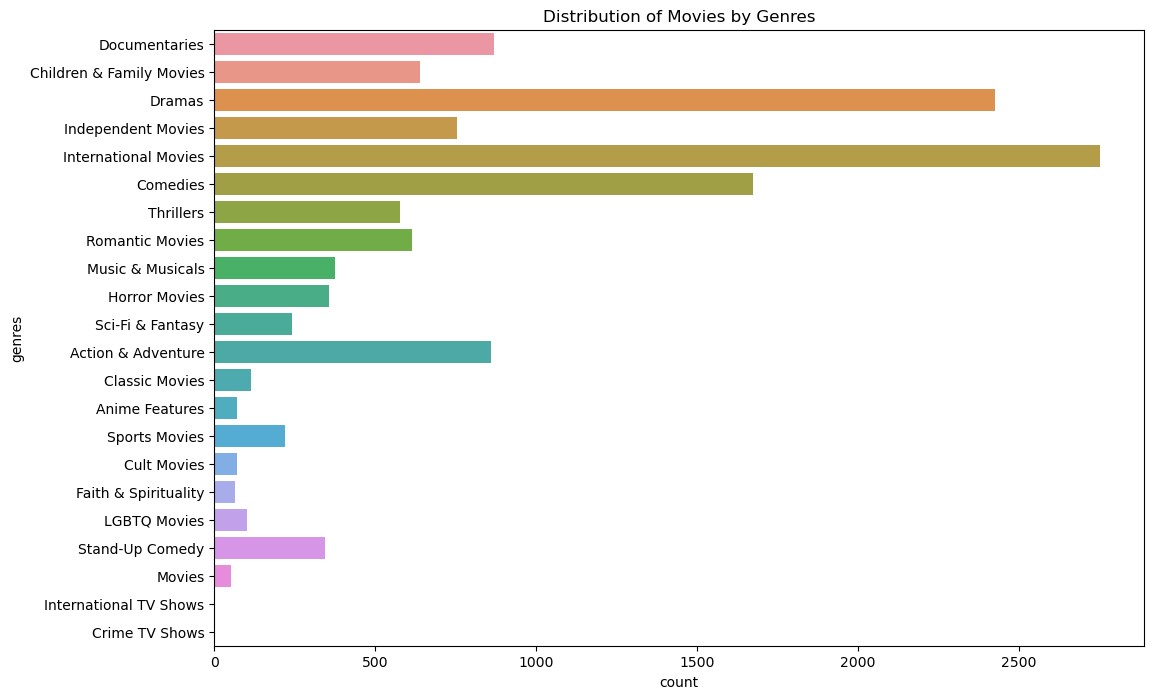

In [48]:
# filtering the data to movies type
movie_genres = df_genres[df_genres['type'] == 'Movie']

# cleaning the genre column
movie_genres['genres'] = movie_genres['genres'].str.strip()

# figure size
plt.figure(figsize = (12,8))

# countplot of genres
sns.countplot(data = movie_genres, y = 'genres')
plt.title('Distribution of Movies by Genres')

1. Netflix has more international movies, followed by dramas, comedies, action & adventures and documentries.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12360\4005888716.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_genres['genres'] = movie_genres['genres'].str.strip()


Text(0.5, 1.0, 'Distribution of TV Shows by Genres')

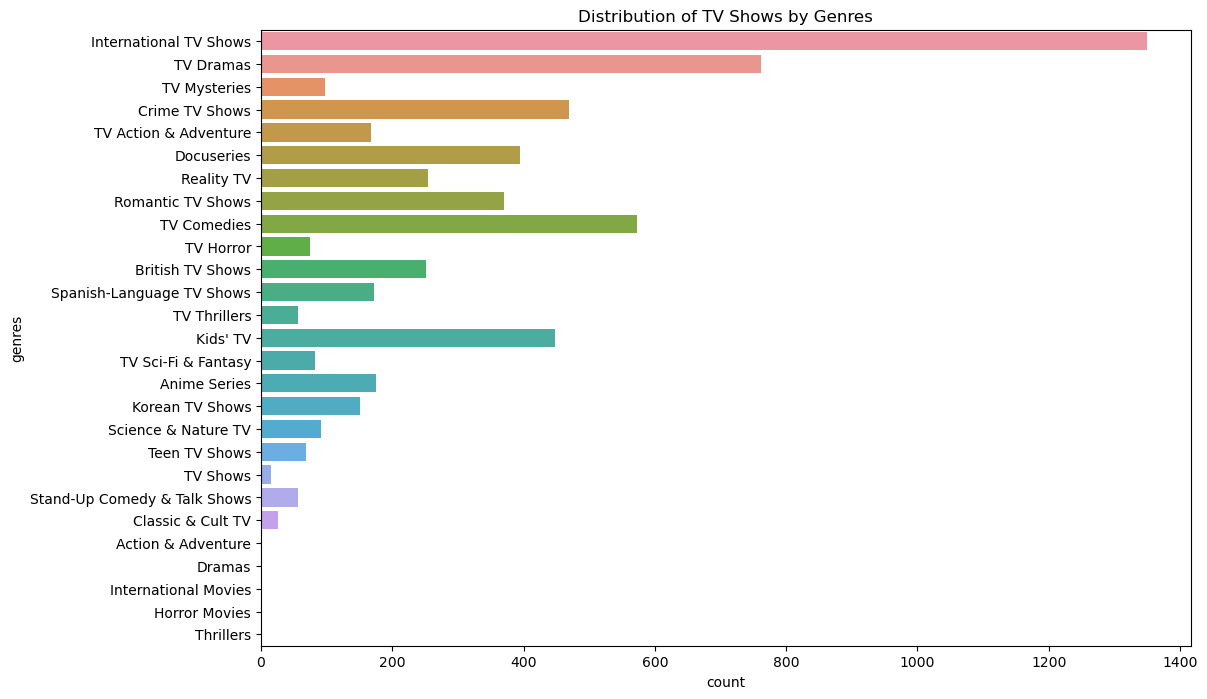

In [49]:
# filtering the data to movies type
movie_genres = df_genres[df_genres['type'] == 'TV Show']

# cleaning the genre column
movie_genres['genres'] = movie_genres['genres'].str.strip()

# figure size
plt.figure(figsize = (12,8))

# countplot of genres
sns.countplot(data = movie_genres, y = 'genres')
plt.title('Distribution of TV Shows by Genres')

Most appearing categories are - 
1. International TV Shows
2. TV Dramas
3. Comedies
4. Crime Shows
5. Kids

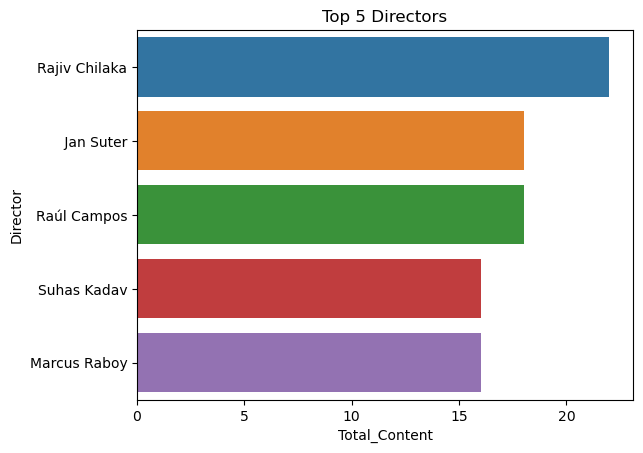

In [50]:
# create empty dataframe
fil_director = pd.DataFrame()

# splitting the dataset on ',' and stacking
fil_director = df['director'].str.strip().str.split(',',expand = True).stack()

# converting to dataframe
fil_director = fil_director.to_frame()

fil_director.columns = ['Director']

# group by director and get size as total content
directors = fil_director.groupby(fil_director['Director']).size().reset_index(name = 'Total_Content')

# filtered the data for Unknown directors
directors = directors[directors['Director'] != 'Unknown']

# sorting
directors = directors.sort_values(by = ['Total_Content'], ascending = False )

top5directors = directors.head(5)

# barplot
sns.barplot(data = top5directors, y = 'Director', x = 'Total_Content')
plt.title('Top 5 Directors')
plt.show()

TOP Directors -
1. Rajiv Chilaka
2. Jan Suter
3. Raul Campos
4. Suhas Kadav

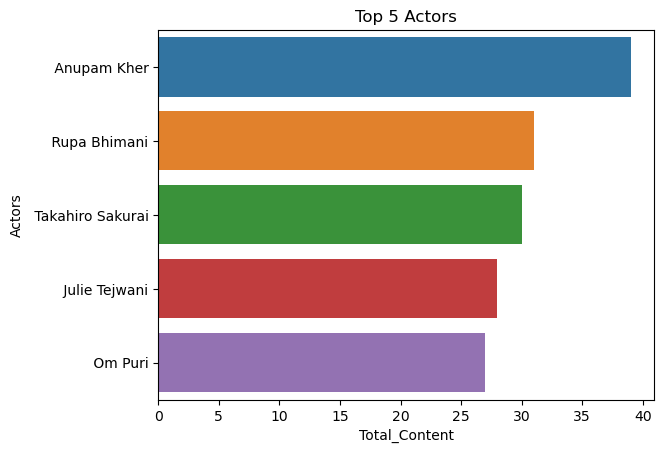

In [51]:
# create empty dataframe
fil_cast = pd.DataFrame()

# splitting the dataset on ',' and stacking
fil_cast = df['cast'].str.split(',', expand = True).stack()

fil_cast = fil_cast.to_frame()

fil_cast.columns = ['Actors']

# group by director and get size as total content
actors = fil_cast.groupby(fil_cast['Actors']).size().reset_index(name = 'Total_Content')

# filtered the data for Unknown directors
actors = actors[actors['Actors'] != 'Unknown']

actors = actors.sort_values(by = ['Total_Content'], ascending = False)

top5_actors = actors.head(5)

# barplot
sns.barplot(data = top5_actors, y = 'Actors', x = 'Total_Content')
plt.title('Top 5 Actors')
plt.show()

Top Actors
1. Anupam Kher
2. Rupa Bhimani
3. Takahiro Sakurai
4. Julie Tejwani

In [52]:
# expanding the nested country col
countries = df['country'].str.split(',').tolist()
country_df = pd.DataFrame(countries, index = df['title'])
country_df = country_df.stack().reset_index()
country_df = country_df.drop(columns = 'level_1')
country_df.columns = ['title','country']

In [53]:
# expanding the nested director col
directors = df['director'].str.split(',').tolist()
director_df = pd.DataFrame(directors, index = df['title'])
director_df = director_df.stack().reset_index()
director_df = director_df.drop(columns = 'level_1')
director_df.columns = ['title','directors']

In [54]:
# expanding the nested cast col
actors = df['cast'].str.split(',').tolist()
actors_df = pd.DataFrame(actors, index = df['title'])
actors_df = actors_df.stack().reset_index()
actors_df = actors_df.drop(columns = 'level_1')
actors_df.columns = ['title','actors']

In [55]:
# created a copy of df
temp_df = df.copy()

# merging the expanded_df's with temp_df
temp_df = temp_df.merge(country_df, on = 'title')
temp_df = temp_df.merge(director_df, on = 'title')
temp_df = temp_df.merge(actors_df, on = 'title')

# drop the extra columns 
temp_df = temp_df.drop(columns = ['director','country_x','cast'])

# rename the country columns
temp_df = temp_df.rename(columns = {'country_y':'country'})

# removing extra spaces
temp_df['country'] = temp_df['country'].str.strip()

# filtering the data
temp_df = temp_df[temp_df['country'] != 'Unknown']
temp_df = temp_df[temp_df['actors'] != 'Unknown']
temp_df = temp_df[temp_df['directors'] != 'Unknown']

In [56]:
# top countries wise top actors & directors
from IPython.display import display, HTML

country = temp_df['country'].value_counts()[:5].index.tolist()

for val in country:
    if val != 'Unknown':
        display(HTML(f"<b>{val}</b>"))
        display(temp_df.loc[temp_df['country'] == val,'actors'].value_counts()[:2])
        print('\n')
        display(temp_df.loc[temp_df['country'] == val,'directors'].value_counts()[:2])
        print('\n')

actors
Alfred Molina     24
Liev Schreiber    23
Name: count, dtype: int64

directors
Martin Scorsese     139
Steven Spielberg    121
Name: count, dtype: int64

actors
Anupam Kher    36
Om Puri        27
Name: count, dtype: int64

directors
David Dhawan      90
Anurag Kashyap    71
Name: count, dtype: int64

actors
Michael Palin    12
John Cleese      11
Name: count, dtype: int64

directors
Sarah Smith        44
Martin Campbell    35
Name: count, dtype: int64

actors
John Paul Tremblay    22
John Dunsworth        21
Name: count, dtype: int64

directors
Robert Vince        48
Mike Clattenburg    48
Name: count, dtype: int64

actors
Frank Langella    12
Alfred Molina     12
Name: count, dtype: int64

directors
Youssef Chahine    35
Thierry Donard     33
Name: count, dtype: int64

### **Insights**
1. Netflix has around 6,000 movies and only about 2,500 TV shows till 2019. This shows a significant difference in the number of movies versus TV shows available.
2. April, July, and December are the months when more movies are added to the platform.
3. Movies are added much more frequently than TV shows.
4. In 2021, the number of TV shows added surpassed the number of movies, which is a change from previous years.
5. Top Contributors -
   - Top Director - Rajiv Chilaka
   - Top Actor - Anupam Kherher

**Movies**
1. The average duration of movies on Netflix is 100 minutes.
2. Most movies are rated TV-MA, followed by TV-14 and R.
3. There is significantly less content for general audiences and all ages, indicating a focus on mature content.
4. The movies's duration less than or equal to 50 mins are either stand-up comedies , documentries or kids's movies.4
5. Most movies on Netflix are from the United States, followed by India and the United Kingdom..

**TV-Shows**
1. Most TV shows have either 1 or 2 seasons. More than 1,750 TV shows have only one season, followed by those with two and three seasons.
2. Most TV shows are also rated TV-MA, followed by TV-14 and TV-PG.
3. Most TV shows are adult-rated or require parental guidance.
4. The most common categories are International TV Shows, TV Dramas, Comedies, Crime Shows, and Kids' Show
5. Most TV shows are from the United States, followed by the United Kingdom, South Korea, and Japan.s

### **Recommendation**
1. There is currently a significant focus on mature content. Increasing the availability of shows and movies targeted at children and for general audiences can attract a wider range of viewers, including families.
2.  South Korean TV shows and movies are experiencing a global boom in popularity. Capitalizing on this trend can help Netflix tap into a highly engaged audience and expand its subscriber base.
3.  Expanding partnerships with international creators can bring fresh and diverse content to Netflix’s global audience.